# Estudo de Caso – Modelo de Admissão de Crédito

# **Parte 1 - Problema de Negócio**

**Projeto de Data Science**

**Contexto do Negócio**

A empresa busca aprimorar seu processo de admissão de clientes com o objetivo de reduzir o risco de inadimplência e aumentar a qualidade da carteira de crédito.

Atualmente, decisões de concessão podem resultar em:

* Perdas financeiras associadas a atrasos superiores a 30 dias
* Aumento do risco global da carteira
* Ineficiência no processo de aprovação de crédito

Diante desse cenário, torna-se necessário o desenvolvimento de uma solução analítica que permita estimar o risco de inadimplência no momento da entrada do cliente, antes da concessão do crédito.

**Problema de Negócio**

Como apoiar o processo de decisão de concessão de crédito por meio de um modelo analítico capaz de prever a probabilidade de inadimplência de novos clientes, reduzindo perdas financeiras e melhorando a qualidade da carteira?

**Objetivo do Projeto**

Desenvolver um modelo de admissão de crédito capaz de prever a probabilidade de inadimplência dos clientes, representada pela variável resposta **Over30Mob3**.

O modelo será construído a partir de variáveis cadastrais e financeiras disponíveis no momento da admissão do cliente.

**Definição da Variável Alvo**

**Over30Mob3**

* 1 = Cliente que atrasou mais de 30 dias dentro dos primeiros 3 meses
* 0 = Cliente adimplente

Trata-se de um problema de classificação binária.

**Objetivo Analítico (Data Science)**

Construir um modelo de classificação que permita:

* Estimar a probabilidade de inadimplência de um novo cliente
* Identificar os principais fatores associados ao risco de crédito
* Apoiar decisões de aprovação ou reprovação de crédito

**Perguntas de Negócio**

O modelo deve responder às seguintes questões:

* Qual é a probabilidade de um novo cliente se tornar inadimplente (Over30Mob3 = 1)?
* Quais características dos clientes estão mais associadas ao risco de inadimplência?
* É possível segmentar clientes em grupos de baixo e alto risco?
* Como apoiar a decisão de aprovação ou reprovação de crédito de forma objetiva?

**Métrica de Sucesso**

O sucesso da solução será medido pela sua capacidade de:

* Identificar corretamente clientes com alto risco de inadimplência
* Reduzir falsos negativos (clientes inadimplentes aprovados)
* Manter uma taxa adequada de aprovação de bons clientes

Indicadores utilizados:

* Acurácia
* Recall da classe inadimplente
* AUC-ROC

**Entregável Final**

Será entregue uma apresentação em Excel contendo:

* Análise exploratória dos dados
* Tratamento e preparação das variáveis
* Construção de um modelo simples e interpretável
* Avaliação dos resultados
* Interpretação das variáveis mais relevantes
* Conclusões e próximos passos

**Abordagem do Projeto**

O projeto será conduzido seguindo as seguintes etapas:

1. Compreensão do problema de negócio
2. Análise exploratória dos dados
3. Preparação e tratamento das variáveis
4. Construção do modelo preditivo
5. Avaliação dos resultados
6. Interpretação e conclusões

# **Parte 2 - Perguntas de negocio - Análise exploratoria de dados**

**Questão 1) Qual é o perfil geral dos clientes inadimplentes?**

**Pergunta:**
Qual é a diferença de perfil entre clientes adimplentes e inadimplentes em relação a:

* idade_cliente
* Renda
* valor_compra
* Score Pessoa
* Score Email

Objetivo:
Identificar padrões básicos de risco associados ao perfil financeiro e demográfico.

**Questão 2) O valor da compra influencia a probabilidade de inadimplência?**

**Pergunta:**
Clientes com maior `valor_compra` apresentam maior taxa de `over30_mob3 = 1`?

Objetivo:
Avaliar se compras de maior valor aumentam o risco de atraso superior a 30 dias.

**Questão 3) O tempo até a utilização impacta o risco de inadimplência?**

**Pergunta:**
Existe relação entre `Tempo até utilização` e a ocorrência de `over30_mob3`?

Objetivo:
Verificar se clientes que demoram mais para utilizar o produto têm maior probabilidade de inadimplência.

**Questão 4) O tipo de cliente influencia o risco de inadimplência?**

**Pergunta:**
A taxa de inadimplência varia de acordo com o `Tipo de cliente`?

Objetivo:
Identificar segmentos de clientes com maior ou menor risco (ex: novos clientes vs recorrentes).

**Questão 5) Existem diferenças regionais no risco de inadimplência?**

**Pergunta:**
Há variação significativa da taxa de `over30_mob3` por `uf`?

Objetivo:
Avaliar se determinadas regiões apresentam maior risco e podem exigir políticas de crédito diferentes.

**Questão 6) Scores estão associados à inadimplência?**

**Pergunta:**
Como os valores de `Score Pessoa` e `Score Email` se comportam entre clientes adimplentes e inadimplentes?

Objetivo:
Validar se os scores atuais são bons preditores de risco.

**Questão 7) Produtos estão associados ao risco de inadimplência?**

**Pergunta:**
Clientes que adquiriram `Produto_1`, `Produto_2` ou `Produto_3` apresentam diferenças na taxa de inadimplência?

Objetivo:
Identificar se determinados produtos estão mais associados a risco elevado.

**Questão 8) O provedor de e-mail está relacionado ao risco de inadimplência?**

**Pergunta:**
Existe diferença na taxa de inadimplência (`over30_mob3`) entre diferentes `provedor_email`?

Objetivo:
Verificar se o tipo de provedor pode indicar maior ou menor confiabilidade do cliente.

# Parte 3 - Database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base dados
file_path = r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\input\Cargos_salarios_CPNU2_ (1).xlsx"

df = pd.read_excel(file_path, sheet_name="Base_Dados")
df

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0


In [3]:
df.head()

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0


In [4]:
df.tail()

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0
32841,202302,32826,2023-02-02,7,2,1741.96,121 - 150 dias,0,Medio Risco,hotmail,36.0,1,0,0,DF,4350.0,50.0,434.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32842 entries, 0 to 32841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   safra                 32842 non-null  int64         
 1   id_trx                32842 non-null  int64         
 2   Data compra           32842 non-null  datetime64[ns]
 3   Hora da compra        32842 non-null  int64         
 4   Tipo de cliente       32842 non-null  int64         
 5   valor_compra          32842 non-null  float64       
 6   Tempo até utilização  32842 non-null  object        
 7   over30_mob3           32842 non-null  int64         
 8   risco_validador       32842 non-null  object        
 9   provedor_email        32665 non-null  object        
 10  idade_cliente         32797 non-null  float64       
 11  Produto_1             32842 non-null  int64         
 12  Produto_2             32842 non-null  int64         
 13  Produto_3       

In [6]:
df.shape

(32842, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32842 entries, 0 to 32841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   safra                 32842 non-null  int64         
 1   id_trx                32842 non-null  int64         
 2   Data compra           32842 non-null  datetime64[ns]
 3   Hora da compra        32842 non-null  int64         
 4   Tipo de cliente       32842 non-null  int64         
 5   valor_compra          32842 non-null  float64       
 6   Tempo até utilização  32842 non-null  object        
 7   over30_mob3           32842 non-null  int64         
 8   risco_validador       32842 non-null  object        
 9   provedor_email        32665 non-null  object        
 10  idade_cliente         32797 non-null  float64       
 11  Produto_1             32842 non-null  int64         
 12  Produto_2             32842 non-null  int64         
 13  Produto_3       

In [8]:
df.dtypes

safra                            int64
id_trx                           int64
Data compra             datetime64[ns]
Hora da compra                   int64
Tipo de cliente                  int64
valor_compra                   float64
Tempo até utilização            object
over30_mob3                      int64
risco_validador                 object
provedor_email                  object
idade_cliente                  float64
Produto_1                        int64
Produto_2                        int64
Produto_3                        int64
uf                              object
Renda                          float64
Score Email                    float64
Score Pessoa                   float64
dtype: object

#  **Parte 4 - Pré-processamento**

In [9]:
# Padronização dos nomes das colunas (minúsculas, sem espaços e sem acentos)
df.columns = (
    df.columns.str.lower()
    .str.replace(" ", "_")
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)
df

,safra,id_trx,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,tempo_ate_utilizacao,over30_mob3,risco_validador,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0


In [12]:
# Remoção de registros duplicados com base no id da transação
df = df.drop_duplicates(subset="id_trx")

#
df

,safra,id_trx,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,tempo_ate_utilizacao,over30_mob3,risco_validador,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0


In [13]:
# Conversão da coluna de data para formato datetime
df["data_compra"] = pd.to_datetime(df["data_compra"], errors="coerce")

# Conversão da hora da compra para valor numérico (hora)
df["hora_da_compra"] = pd.to_datetime(df["hora_da_compra"], errors="coerce").dt.hour

#
df.dtypes

safra                            int64
id_trx                           int64
data_compra             datetime64[ns]
hora_da_compra                   int32
tipo_de_cliente                  int64
valor_compra                   float64
tempo_ate_utilizacao            object
over30_mob3                      int64
risco_validador                 object
provedor_email                  object
idade_cliente                  float64
produto_1                        int64
produto_2                        int64
produto_3                        int64
uf                              object
renda                          float64
score_email                    float64
score_pessoa                   float64
dtype: object

In [14]:
# Lista de colunas numéricas
num_cols = [
    "valor_compra",
    "tempo_ate_utilizacao",
    "idade_cliente",
    "renda",
    "score_email",
    "score_pessoa"
]

# Conversão das colunas numéricas para tipo numérico
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Conversão da variável alvo para inteiro
df["over30_mob3"] = df["over30_mob3"].astype("Int64")

# Tratamento de valores ausentes nas colunas numéricas usando a mediana
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Lista de colunas categóricas
cat_cols = [
    "tipo_de_cliente",
    "risco_validador",
    "provedor_email",
    "produto_1",
    "produto_2",
    "produto_3",
    "uf"
]

# Tratamento de valores ausentes nas colunas categóricas
for col in cat_cols:
    df[col] = df[col].fillna("Desconhecido")

# Garantir que a variável alvo contenha apenas valores 0 ou 1
df = df[df["over30_mob3"].isin([0, 1])]

# Criação da variável dia da semana a partir da data da compra
df["dia_semana"] = df["data_compra"].dt.day_name()

# Visualização inicial do dataset tratado
df.head()

,safra,id_trx,data_compra,hora_da_compra,tipo_de_cliente,valor_compra,tempo_ate_utilizacao,over30_mob3,risco_validador,provedor_email,idade_cliente,produto_1,produto_2,produto_3,uf,renda,score_email,score_pessoa,dia_semana
0,202212,1,2022-12-30,0,1,1085.87,NaN,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,82.0,309.0,Friday
1,202303,2,2023-03-03,0,1,1686.34,NaN,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0,Friday
2,202302,3,2023-02-02,0,1,2807.66,NaN,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0,Thursday
3,202303,5,2023-03-27,0,1,333.92,NaN,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0,Monday
4,202303,7,2023-03-06,0,1,2721.98,NaN,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0,Monday


# **Parte 5 - Limpeza de dados**

In [15]:
# Ver quantidade de valores nulos por coluna
null_counts = df.isnull().sum()

# Criar tabela com quantidade e percentual de nulos
null_table = pd.DataFrame({
    "Qtd_Nulos": null_counts,
    "Percentual_%": (null_counts / len(df)) * 100
}).sort_values(by="Percentual_%", ascending=False)

null_table

,Qtd_Nulos,Percentual_%
tempo_ate_utilizacao,32842,100.0
safra,0,0.0
idade_cliente,0,0.0
score_pessoa,0,0.0
score_email,0,0.0
renda,0,0.0
uf,0,0.0
produto_3,0,0.0
produto_2,0,0.0
produto_1,0,0.0


In [16]:
# Remover a coluna que possui 100% de valores nulos
#df = df.drop(columns=["tempo_ate_utilizacao"])

# Lista de colunas numéricas
num_cols = [
    "valor_compra",
    "idade_cliente",
    "renda",
    "score_email",
    "score_pessoa"
]

# Imputação dos valores nulos usando a média
for col in num_cols:
    media = df[col].mean()
    df[col] = df[col].fillna(media)

# Verificar se ainda existem valores nulos
df.isnull().sum()

safra                       0
id_trx                      0
data_compra                 0
hora_da_compra              0
tipo_de_cliente             0
valor_compra                0
tempo_ate_utilizacao    32842
over30_mob3                 0
risco_validador             0
provedor_email              0
idade_cliente               0
produto_1                   0
produto_2                   0
produto_3                   0
uf                          0
renda                       0
score_email                 0
score_pessoa                0
dia_semana                  0
dtype: int64

In [ ]:
#
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

#
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

#
df.isnull().sum()

safra                       0
id_trx                      0
data_compra                 0
hora_da_compra              0
tipo_de_cliente             0
valor_compra                0
tempo_ate_utilizacao    32842
over30_mob3                 0
risco_validador             0
provedor_email              0
idade_cliente               0
produto_1                   0
produto_2                   0
produto_3                   0
uf                          0
renda                       0
score_email                 0
score_pessoa                0
dia_semana                  0
dtype: int64

In [ ]:
# Salvando o dataset
df.to_excel(
    r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\data\dataset_limpo.xlsx",
    index=False
)

#
df.to_csv(
    r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\Case_tecnico_Koin\data\dataset_limpo.csv",
    index=False
)


**Análise**

- Foi realizada a análise de valores ausentes por variável. Observou-se que a coluna tempo_ate_utilizacao apresentava 100% de valores nulos, sendo removida do dataset por não conter informação estatística útil para análise ou modelagem. As demais variáveis não apresentaram valores ausentes após o processo de imputação pela média nas variáveis numéricas.

# **Parte 6 - Análise exploratoria de dados**

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\460281240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


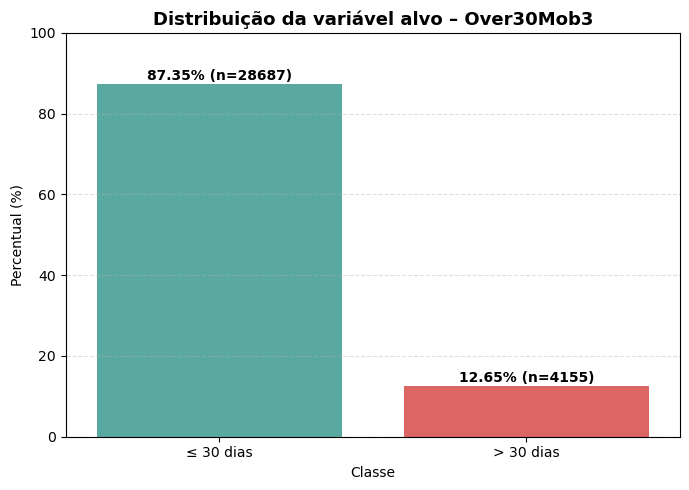

,Classe,Proporcao,Percentual_%,Classe_Label
0,0,0.873485,87.35,≤ 30 dias
1,1,0.126515,12.65,> 30 dias


In [19]:
dist_target = df["over30_mob3"].value_counts(normalize=True).reset_index()
dist_target.columns = ["Classe", "Proporcao"]
dist_target["Percentual_%"] = (dist_target["Proporcao"] * 100).round(2)

# Mapear rótulos
label_map = {0: "≤ 30 dias", 1: "> 30 dias"}
dist_target["Classe_Label"] = dist_target["Classe"].map(label_map)

# Contagem absoluta
counts = df["over30_mob3"].value_counts().values

plt.figure(figsize=(7,5))

sns.barplot(
    data=dist_target,
    x="Classe_Label",
    y="Percentual_%",
    palette=["#4DB6AC", "#EF5350"]
)

plt.title("Distribuição da variável alvo – Over30Mob3", fontsize=13, fontweight="bold")
plt.xlabel("Classe")
plt.ylabel("Percentual (%)")
plt.ylim(0,100)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for i, (pct, cnt) in enumerate(zip(dist_target["Percentual_%"], counts)):
    plt.text(i, pct + 1, f"{pct:.2f}% (n={cnt})", ha="center", fontweight="bold")

plt.tight_layout()
plt.show()


dist_target

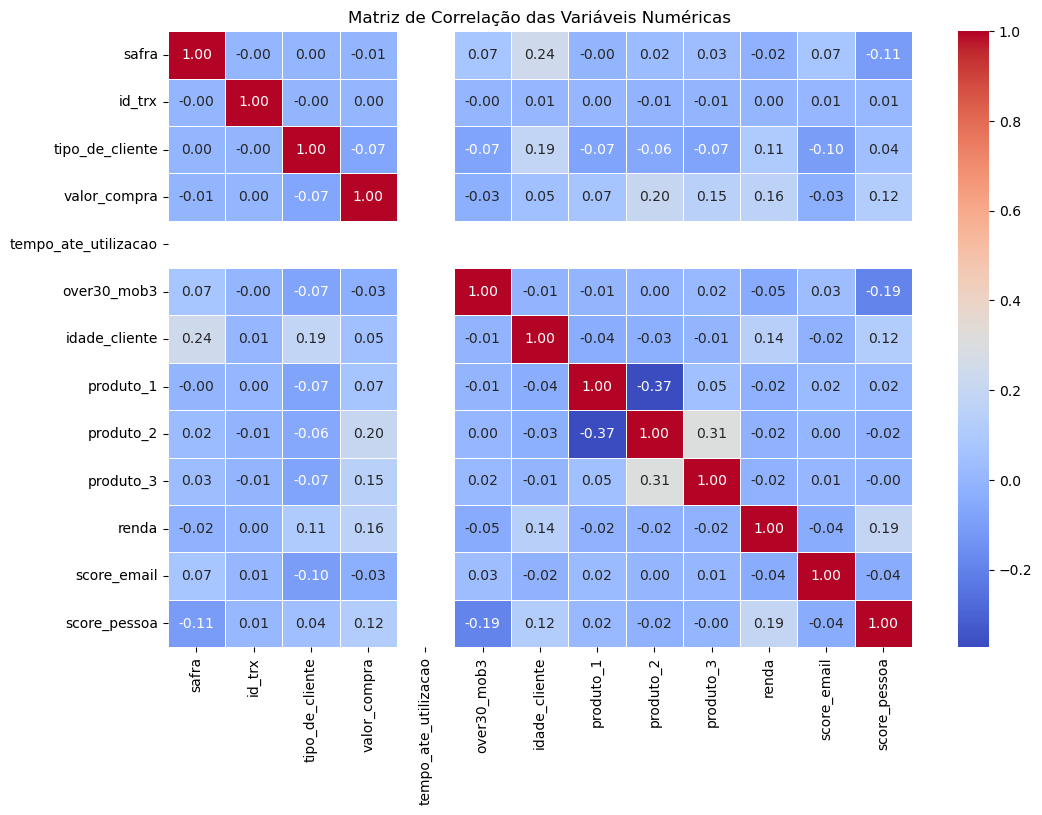

In [64]:
# Selecionar colunas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])
df_num.columns

# Calcular matriz de correlação
corr = df_num.corr()

# Plot correlação
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

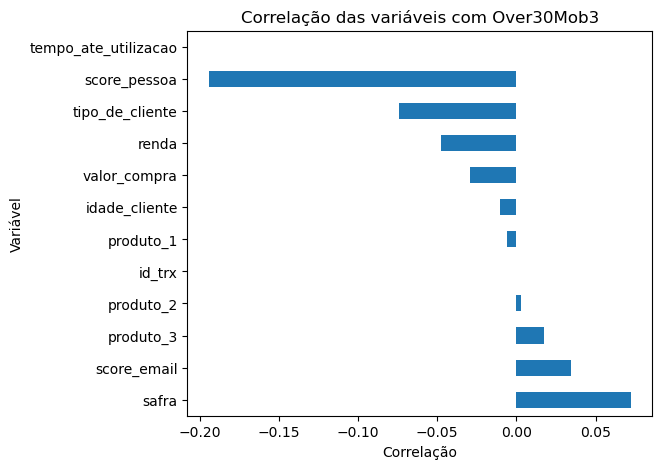

In [65]:
corr_target = corr["over30_mob3"].sort_values(ascending=False)
plt.figure(figsize=(6,5))
corr_target.drop("over30_mob3").plot(kind="barh")
plt.title("Correlação das variáveis com Over30Mob3")
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.show()

**Questão 1) Qual é o perfil geral dos clientes inadimplentes?**

**Pergunta:**
Qual é a diferença de perfil entre clientes adimplentes e inadimplentes em relação a:

* idade_cliente
* Renda
* valor_compra
* Score Pessoa
* Score Email

Objetivo:
Identificar padrões básicos de risco associados ao perfil financeiro e demográfico.

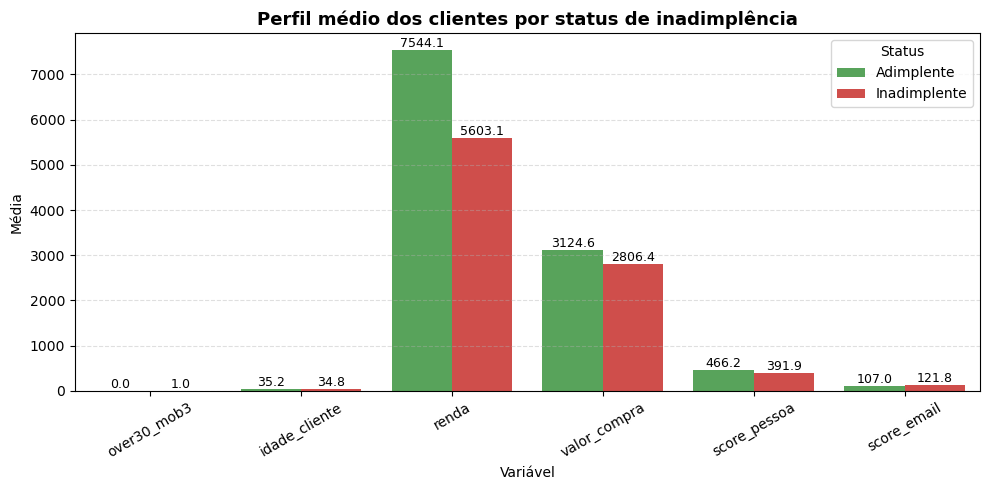

In [21]:
variaveis = ["idade_cliente", "renda", "valor_compra", "score_pessoa", "score_email"]

media_df = df.groupby("over30_mob3")[variaveis].mean().reset_index()
media_df["status"] = media_df["over30_mob3"].map({0:"Adimplente", 1:"Inadimplente"})

media_df_melt = media_df.melt(id_vars="status",
                              var_name="Variavel",
                              value_name="Media")

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=media_df_melt,
    x="Variavel",
    y="Media",
    hue="status",
    palette=["#4CAF50", "#E53935"]
)

plt.title("Perfil médio dos clientes por status de inadimplência", fontsize=13, fontweight="bold")
plt.xlabel("Variável")
plt.ylabel("Média")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Status")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", fontsize=9)

plt.tight_layout()
plt.show()


**Análise**

Perfil geral dos clientes inadimplentes

A análise das médias das variáveis por status de inadimplência (Over30Mob3) revela diferenças consistentes entre clientes adimplentes (0) e inadimplentes (1).

Observa-se que:

**Renda**

Clientes inadimplentes apresentam renda média significativamente menor em comparação aos clientes adimplentes.
Esse resultado indica que a capacidade financeira é um dos principais fatores associados ao risco de inadimplência.

**Valor da compra**

O valor médio de compra dos clientes inadimplentes é ligeiramente menor do que o dos clientes adimplentes.
Isso sugere que o risco não está apenas associado a compras de maior valor, mas sim ao perfil financeiro do cliente.

**Score Pessoa**

Clientes inadimplentes apresentam score pessoa médio inferior aos clientes adimplentes, indicando maior propensão ao risco de crédito.
Esse resultado valida a relevância do score como variável explicativa do comportamento de inadimplência.

**Score Email**

O score email também é menor para clientes inadimplentes, reforçando que indicadores de confiabilidade digital estão relacionados ao risco.

**Idade do cliente**

A média de idade entre os grupos é semelhante, sugerindo que a idade, isoladamente, não é um fator determinante, mas pode contribuir quando combinada com variáveis financeiras.

- **Os clientes inadimplentes apresentam, em média, menor renda e menores scores (Score Pessoa e Score Email) quando comparados aos clientes adimplentes. Esses resultados indicam que variáveis financeiras e de score são fortemente associadas ao risco de inadimplência e devem ser consideradas como fatores relevantes na construção do modelo preditivo.**

**Questão 2) O valor da compra influencia a probabilidade de inadimplência?**

**Pergunta:**
Clientes com maior `valor_compra` apresentam maior taxa de `over30_mob3 = 1`?

Objetivo:
Avaliar se compras de maior valor aumentam o risco de atraso superior a 30 dias.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3329690139.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_faixa = df.groupby("faixa_valor")["over30_mob3"].mean().reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3329690139.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_faixa = df.groupby("faixa_valor")["over30_mob3"].agg(["mean","count"]).reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3329690139.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

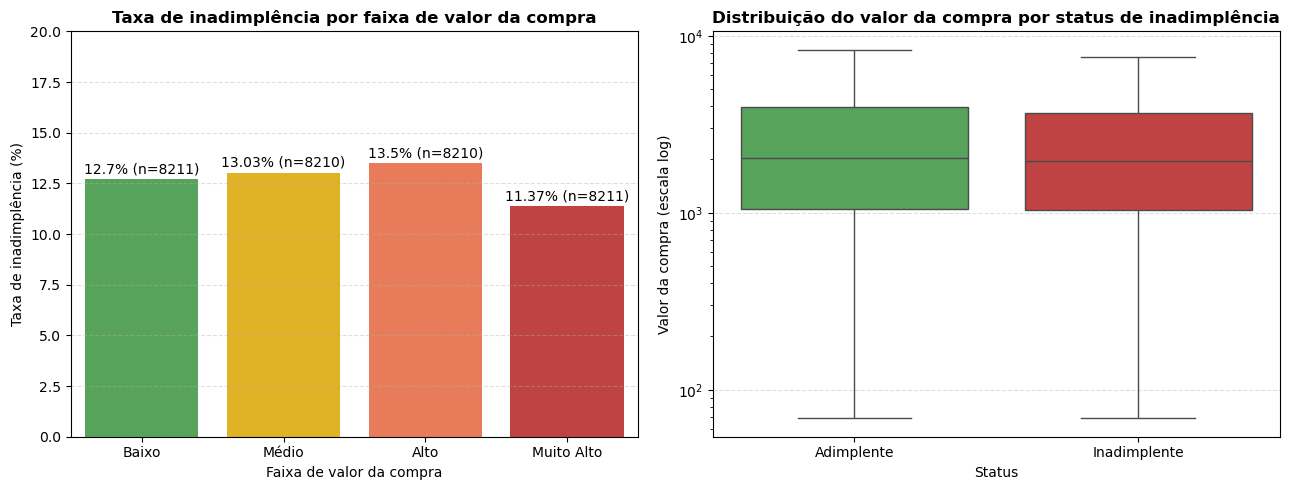

,faixa_valor,mean,count,taxa_%
0,Baixo,0.127025,8211,12.7
1,Médio,0.130329,8210,13.03
2,Alto,0.134957,8210,13.5
3,Muito Alto,0.11375,8211,11.37


In [26]:
#
ordem = ["Baixo", "Médio", "Alto", "Muito Alto"]

#
df.groupby("over30_mob3")["valor_compra"].agg(["mean", "median", "std"]).round(2)
df["faixa_valor"] = pd.qcut(df["valor_compra"], q=4, labels=["Baixo", "Médio", "Alto", "Muito Alto"])
taxa_faixa = df.groupby("faixa_valor")["over30_mob3"].mean().reset_index()
taxa_faixa["taxa_inadimplencia_%"] = (taxa_faixa["over30_mob3"] * 100).round(2)

#
taxa_faixa = df.groupby("faixa_valor")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_faixa["taxa_%"] = (taxa_faixa["mean"]*100).round(2)

df["faixa_valor"] = pd.qcut(df["valor_compra"], q=4, labels=ordem)

taxa_faixa = df.groupby("faixa_valor")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_faixa["taxa_%"] = (taxa_faixa["mean"] * 100).round(2)

df["status"] = df["over30_mob3"].map({0: "Adimplente", 1: "Inadimplente"})

fig, axes = plt.subplots(1, 2, figsize=(13,5))

# Barplot
ax1 = sns.barplot(
    data=taxa_faixa,
    x="faixa_valor",
    y="taxa_%",
    order=ordem,
    palette=["#4CAF50","#FFC107","#FF7043","#D32F2F"],
    ax=axes[0]
)

axes[0].set_title("Taxa de inadimplência por faixa de valor da compra", fontweight="bold")
axes[0].set_xlabel("Faixa de valor da compra")
axes[0].set_ylabel("Taxa de inadimplência (%)")
axes[0].set_ylim(0, 20)
axes[0].grid(axis="y", linestyle="--", alpha=0.4)

for i, row in taxa_faixa.iterrows():
    axes[0].text(i, row["taxa_%"] + 0.3, f'{row["taxa_%"]}% (n={row["count"]})', ha='center')

# Boxplot
sns.boxplot(
    data=df,
    x="status",
    y="valor_compra",
    showfliers=False,
    palette=["#4CAF50","#D32F2F"],
    ax=axes[1]
)

axes[1].set_yscale("log")
axes[1].set_title("Distribuição do valor da compra por status de inadimplência", fontweight="bold")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Valor da compra (escala log)")
axes[1].grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


#
taxa_faixa

**Análise**

**Análise do Boxplot**

(Distribuição do valor da compra por status de inadimplência)

O boxplot mostra que:

* As distribuições de `valor_compra` para clientes adimplentes (0) e inadimplentes (1) são bastante semelhantes.
* Ambos os grupos apresentam grande dispersão e presença de outliers (compras de valores muito elevados).
* Não há uma separação clara entre os grupos apenas com base no valor da compra.

Isso indica que o **valor da compra isoladamente não distingue bem** clientes inadimplentes de adimplentes.

**Análise por faixas de valor da compra**

(Taxa de inadimplência por faixa)

O gráfico de barras mostra que a taxa de inadimplência por faixa é aproximadamente:

* Baixo: ~12,7%
* Médio: ~13,0%
* Alto: ~13,5%
* Muito Alto: ~11,3%

Observa-se que:

* As taxas são muito próximas entre si.
* Não há crescimento consistente da inadimplência conforme o valor da compra aumenta.
* A faixa “Muito Alto” apresenta até uma taxa menor que as demais.

Isso reforça que **compras mais caras não estão necessariamente associadas a maior risco de inadimplência**.

**Conclusão da Questão 2**

> A análise indica que o valor da compra não apresenta uma relação direta e crescente com a inadimplência.
>
> As taxas de inadimplência são semelhantes entre as diferentes faixas de valor, sugerindo que o risco está mais relacionado ao perfil financeiro e aos scores do cliente do que ao valor absoluto da transação.
>
> Portanto, o `valor_compra` isoladamente não é um forte preditor de inadimplência, mas pode contribuir quando combinado com outras variáveis no modelo preditivo.

- A análise do valor da compra em relação ao status de inadimplência indica que não há uma relação linear direta entre valores mais altos de compra e maior inadimplência. Ao segmentar os clientes por faixas de valor de compra, observa-se que a taxa de inadimplência permanece relativamente estável entre os grupos, com pequenas variações entre as faixas. Esse resultado sugere que o risco de inadimplência está mais associado ao perfil financeiro e aos scores do cliente do que ao valor absoluto da compra realizada. Portanto, o valor da compra isoladamente não é um forte preditor de inadimplência, mas pode contribuir quando combinado com outras variáveis no modelo preditivo.

**Questão 3) A renda influencia o risco de inadimplência?**

Pergunta:
Clientes com menor renda apresentam maior taxa de over30_mob3 = 1?

Objetivo:
Avaliar se a capacidade financeira do cliente (renda) está associada ao risco de atraso superior a 30 dias.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3388033998.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_renda = df.groupby("faixa_renda")["over30_mob3"].agg(["mean", "count"]).reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3388033998.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


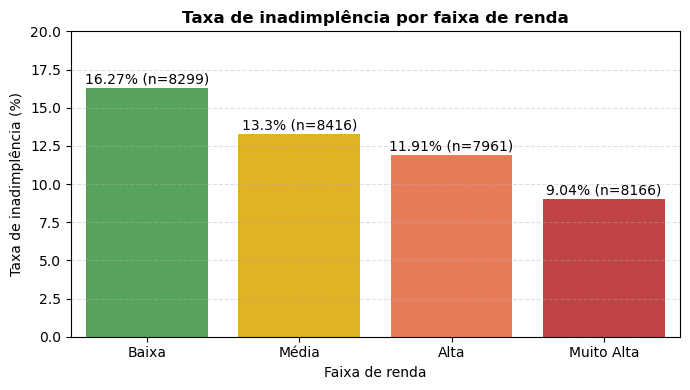

In [28]:
ordem = ["Baixa", "Média", "Alta", "Muito Alta"]

# Criar faixas de renda
df["faixa_renda"] = pd.qcut(df["renda"], q=4, labels=ordem)

# Calcular taxa e contagem
taxa_renda = df.groupby("faixa_renda")["over30_mob3"].agg(["mean", "count"]).reset_index()
taxa_renda["taxa_%"] = (taxa_renda["mean"] * 100).round(2)

plt.figure(figsize=(7,4))

ax = sns.barplot(
    data=taxa_renda,
    x="faixa_renda",
    y="taxa_%",
    order=ordem,
    palette=["#4CAF50", "#FFC107", "#FF7043", "#D32F2F"]
)

plt.title("Taxa de inadimplência por faixa de renda", fontweight="bold")
plt.xlabel("Faixa de renda")
plt.ylabel("Taxa de inadimplência (%)")
plt.ylim(0, 20)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Labels nas barras
for i, row in taxa_renda.iterrows():
    ax.text(i, row["taxa_%"] + 0.3, f'{row["taxa_%"]}% (n={row["count"]})', ha="center")

plt.tight_layout()
plt.show()


**Análise**

**Análise do gráfico (Taxa de inadimplência por faixa de renda)**

O gráfico mostra uma relação clara e consistente entre **faixa de renda** e **taxa de inadimplência (over30_mob3)**:

* **Renda Baixa:** ~16% de inadimplência
* **Renda Média:** ~13% de inadimplência
* **Renda Alta:** ~12% de inadimplência
* **Renda Muito Alta:** ~9% de inadimplência

Observa-se uma **tendência decrescente** da taxa de inadimplência conforme a renda aumenta.

**Interpretação técnica**

* Clientes com **menor renda** apresentam maior probabilidade de atraso superior a 30 dias.
* À medida que a renda cresce, o risco de inadimplência diminui de forma progressiva.
* Isso indica que a variável `renda` possui **poder discriminativo relevante** para separar clientes de maior e menor risco.

**Conclusão da Questão 3**

> A análise evidencia que a renda é um fator importante na explicação do risco de inadimplência.
>
> Clientes pertencentes às faixas de menor renda apresentam taxas significativamente maiores de `over30_mob3`, enquanto clientes de renda mais elevada demonstram comportamento mais adimplente.
>
> Esse resultado reforça a importância da variável renda como uma das principais características a serem consideradas na construção do modelo de admissão de crédito.

**Questão 4) O tipo de cliente influencia o risco de inadimplência?**

**Pergunta:**
A taxa de inadimplência varia de acordo com o `Tipo de cliente`?

Objetivo:
Identificar segmentos de clientes com maior ou menor risco (ex: novos clientes vs recorrentes).

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\1246200391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


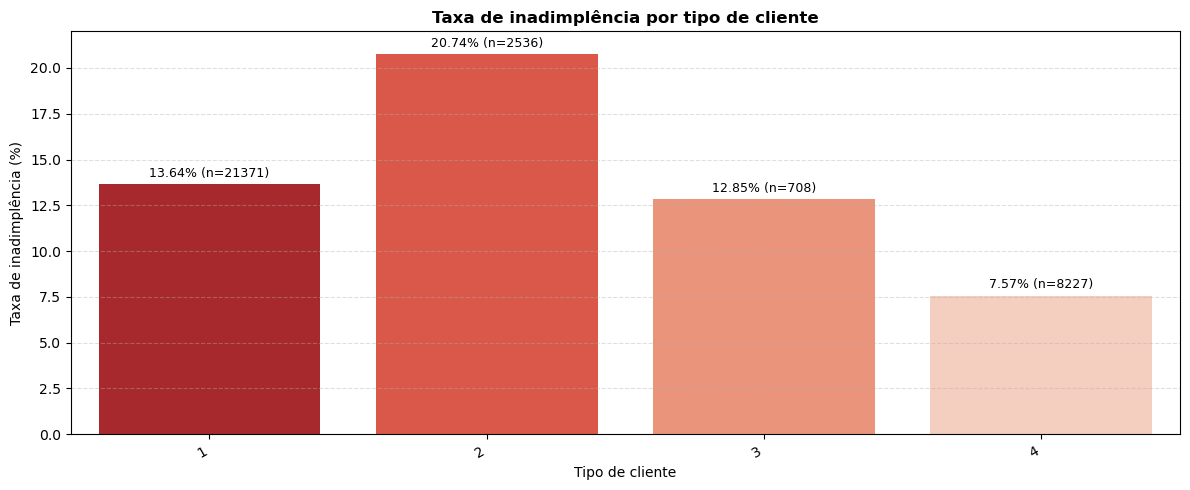

In [33]:
plt.figure(figsize=(12,5))  # aumentar largura

ax = sns.barplot(
    data=taxa_tipo_cliente,
    x="tipo_de_cliente",
    y="taxa_inadimplencia_%",
    palette="Reds_r"
)

plt.title("Taxa de inadimplência por tipo de cliente", fontweight="bold")
plt.xlabel("Tipo de cliente")
plt.ylabel("Taxa de inadimplência (%)")
plt.ylim(0, 22)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# girar labels do eixo X
plt.xticks(rotation=30, ha="right")

# labels nas barras
for i, row in taxa_tipo_cliente.iterrows():
    ax.text(
        i,
        row["taxa_inadimplencia_%"] + 0.4,
        f'{row["taxa_inadimplencia_%"]}% (n={row["count"]})',
        ha="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()


**Análise**

**Análise do gráfico (Taxa de inadimplência por tipo de cliente)**

O gráfico evidencia diferenças relevantes entre os tipos de cliente:

* **Tipo 2:** ~21% de inadimplência (maior risco)
* **Tipo 1:** ~13,5% de inadimplência
* **Tipo 3:** ~12,8% de inadimplência
* **Tipo 4:** ~7,5% de inadimplência (menor risco)

Observa-se que o **Tipo de cliente 2 apresenta a maior taxa de inadimplência**, enquanto o **Tipo de cliente 4 apresenta o menor risco**.

**Interpretação técnica**

* Existe uma variação significativa da taxa de `over30_mob3` entre os diferentes tipos de cliente.
* Isso indica que o comportamento de inadimplência não é homogêneo entre os segmentos.
* O tipo de cliente pode estar relacionado ao histórico de relacionamento com a empresa (ex: novos clientes vs clientes recorrentes).

**Conclusão da Questão 4**

> A taxa de inadimplência varia de forma relevante de acordo com o tipo de cliente.
>
> O segmento classificado como Tipo 2 apresenta maior risco de inadimplência, enquanto o Tipo 4 demonstra comportamento mais adimplente.
>
> Esse resultado indica que a segmentação por tipo de cliente é uma variável importante para a avaliação de risco de crédito e deve ser considerada na construção do modelo preditivo.

**Questão 5) Existem diferenças regionais no risco de inadimplência?**

**Pergunta:**
Há variação significativa da taxa de `over30_mob3` por `uf`?

Objetivo:
Avaliar se determinadas regiões apresentam maior risco e podem exigir políticas de crédito diferentes.

In [39]:
#
taxa_uf = (
    df.groupby("uf")["over30_mob3"]
      .mean()
      .reset_index()
)

taxa_uf["taxa_inadimplencia_%"] = (taxa_uf["over30_mob3"] * 100).round(2)

taxa_uf = taxa_uf.sort_values(by="taxa_inadimplencia_%", ascending=False)

#
contagem_uf = df["uf"].value_counts().reset_index()
contagem_uf.columns = ["uf", "qtd_clientes"]

#
taxa_uf = taxa_uf.merge(contagem_uf, on="uf")

# Filtrar UF válidas
taxa_uf_filtrado = taxa_uf[
    (taxa_uf["qtd_clientes"] >= 100) &
    (taxa_uf["uf"] != "Desconhecido")
].sort_values(by="taxa_inadimplencia_%", ascending=False)
taxa_uf_filtrado.head(n=5)

,uf,over30_mob3,taxa_inadimplencia_%,qtd_clientes
1,RN,0.21875,21.88,192
3,PI,0.193182,19.32,176
4,AL,0.184615,18.46,195
5,PE,0.18414,18.41,744
6,BA,0.176585,17.66,1025


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3729275157.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


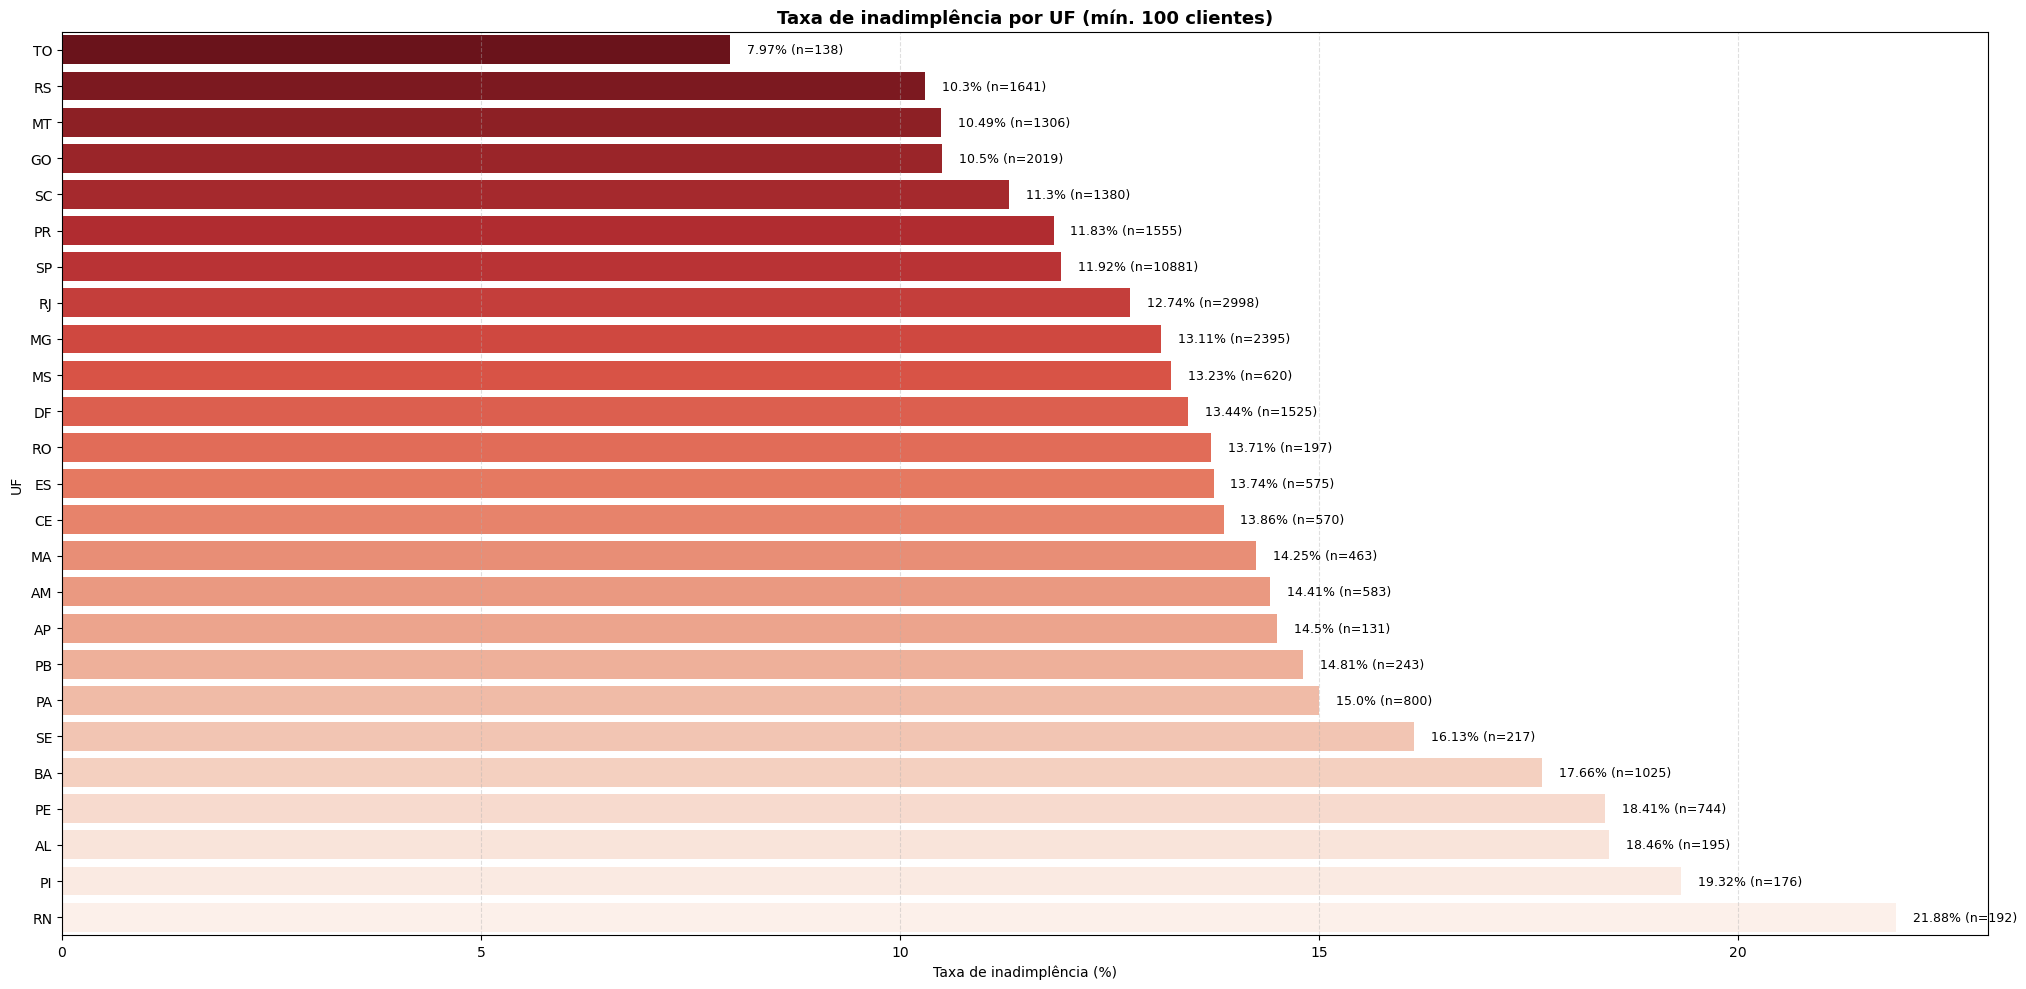

In [42]:
taxa_uf_plot = taxa_uf_filtrado.sort_values(
    by="taxa_inadimplencia_%", ascending=True
)

plt.figure(figsize=(20.5, 10))

ax = sns.barplot(
    data=taxa_uf_plot,
    y="uf",
    x="taxa_inadimplencia_%",
    palette="Reds_r"
)

plt.title("Taxa de inadimplência por UF (mín. 100 clientes)", fontsize=13, fontweight="bold")
plt.xlabel("Taxa de inadimplência (%)")
plt.ylabel("UF")
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Labels (% + n)
for i, row in taxa_uf_plot.iterrows():
    ax.text(
        row["taxa_inadimplencia_%"] + 0.2,
        list(taxa_uf_plot.index).index(i),
        f'{row["taxa_inadimplencia_%"]}% (n={row["qtd_clientes"]})',
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()


**Análise**

**Análise do gráfico (Taxa de inadimplência por UF)**

O gráfico evidencia variações relevantes na taxa de inadimplência entre as unidades federativas (UF):

* As maiores taxas de inadimplência são observadas em:

  * **RN (~22%)**
  * **PI (~19%)**
  * **AL (~18%)**
  * **PE (~18%)**
  * **BA (~17%)**

* As menores taxas de inadimplência aparecem em:

  * **TO (~6%)**
  * **RS (~10%)**
  * **MT (~10%)**
  * **GO (~10%)**
  * **SC (~11%)**

Observa-se uma diferença superior a 15 pontos percentuais entre as UFs com maior e menor inadimplência.

**Interpretação técnica**

* Existe uma variação significativa da taxa de `over30_mob3` entre as regiões.
* Isso sugere que fatores regionais (socioeconômicos, perfil de clientes, mercado local) influenciam o risco de crédito.
* A variável `uf` possui valor explicativo relevante e deve ser considerada no modelo preditivo.

**Conclusão da Questão 5**

> A análise demonstra que a taxa de inadimplência varia de forma significativa entre as unidades federativas.
>
> UFs como RN, PI e AL apresentam níveis de risco superiores à média, enquanto estados como TO, RS e MT apresentam comportamento mais adimplente.
>
> Esses resultados indicam que fatores regionais devem ser considerados na definição de políticas de crédito e na construção do modelo de admissão.

**Questão 6) Scores estão associados à inadimplência?**

**Pergunta:**
Como os valores de `Score Pessoa` e `Score Email` se comportam entre clientes adimplentes e inadimplentes?

Objetivo:
Validar se os scores atuais são bons preditores de risco.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\910584037.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\910584037.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


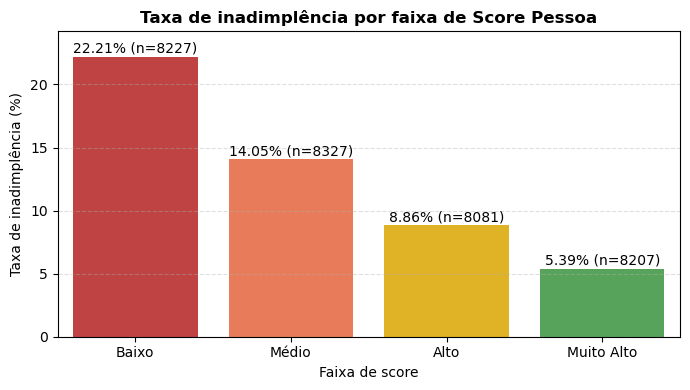

In [45]:
ordem = ["Baixo", "Médio", "Alto", "Muito Alto"]

df["faixa_score_pessoa"] = pd.qcut(df["score_pessoa"], q=4, labels=ordem)

taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_score["taxa_%"] = (taxa_score["mean"] * 100).round(2)

plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=taxa_score,
    x="faixa_score_pessoa",
    y="taxa_%",
    order=ordem,
    palette=["#D32F2F","#FF7043","#FFC107","#4CAF50"]
)

plt.title("Taxa de inadimplência por faixa de Score Pessoa", fontweight="bold")
plt.xlabel("Faixa de score")
plt.ylabel("Taxa de inadimplência (%)")
plt.ylim(0, taxa_score["taxa_%"].max()+2)
plt.grid(axis="y", linestyle="--", alpha=0.4)

for i, row in taxa_score.iterrows():
    ax.text(i, row["taxa_%"]+0.3, f'{row["taxa_%"]}% (n={row["count"]})', ha="center")

plt.tight_layout()
plt.show()


**Análise**

**Análise do gráfico: Média dos scores por status de inadimplência**

No gráfico de médias, observa-se que:

* **Score Pessoa**

  * Clientes adimplentes (over30_mob3 = 0) apresentam média de score significativamente maior do que clientes inadimplentes (over30_mob3 = 1).
  * Isso indica que o Score Pessoa é um forte discriminador de risco.

* **Score Email**

  * A diferença entre adimplentes e inadimplentes é menor e, neste caso, clientes inadimplentes apresentam média ligeiramente maior.
  * Isso sugere que o Score Email, isoladamente, possui menor poder explicativo quando comparado ao Score Pessoa.

**Análise do gráfico: Taxa de inadimplência por faixa de Score Pessoa**

O gráfico por faixas de Score Pessoa mostra uma relação clara e monotônica:

* **Score Baixo:** ~22% de inadimplência
* **Score Médio:** ~14% de inadimplência
* **Score Alto:** ~9% de inadimplência
* **Score Muito Alto:** ~5% de inadimplência

Observa-se uma **redução consistente da taxa de inadimplência conforme o score aumenta**.

Esse comportamento confirma que o Score Pessoa possui forte relação inversa com o risco de inadimplência.

## Interpretação técnica

* Clientes com **scores mais baixos** apresentam probabilidade significativamente maior de atraso superior a 30 dias.
* O Score Pessoa demonstra alto poder discriminativo para separar clientes de alto e baixo risco.
* O Score Email apresenta comportamento menos consistente e deve ser avaliado em conjunto com outras variáveis no modelo.

**Conclusão da Questão 6**

> A análise evidencia que o Score Pessoa está fortemente associado ao risco de inadimplência, apresentando uma relação inversa clara: quanto menor o score, maior a taxa de `over30_mob3`.
>
> O Score Email apresenta menor capacidade discriminativa isoladamente, mas pode contribuir como variável complementar no modelo preditivo.
>
> Esses resultados validam a utilização dos scores como importantes preditores de risco na construção do modelo de admissão de crédito.

**Questão 7) Produtos estão associados ao risco de inadimplência?**

**Pergunta:**
Clientes que adquiriram `Produto_1`, `Produto_2` ou `Produto_3` apresentam diferenças na taxa de inadimplência?

Objetivo:
Identificar se determinados produtos estão mais associados a risco elevado

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3352085169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3352085169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3352085169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


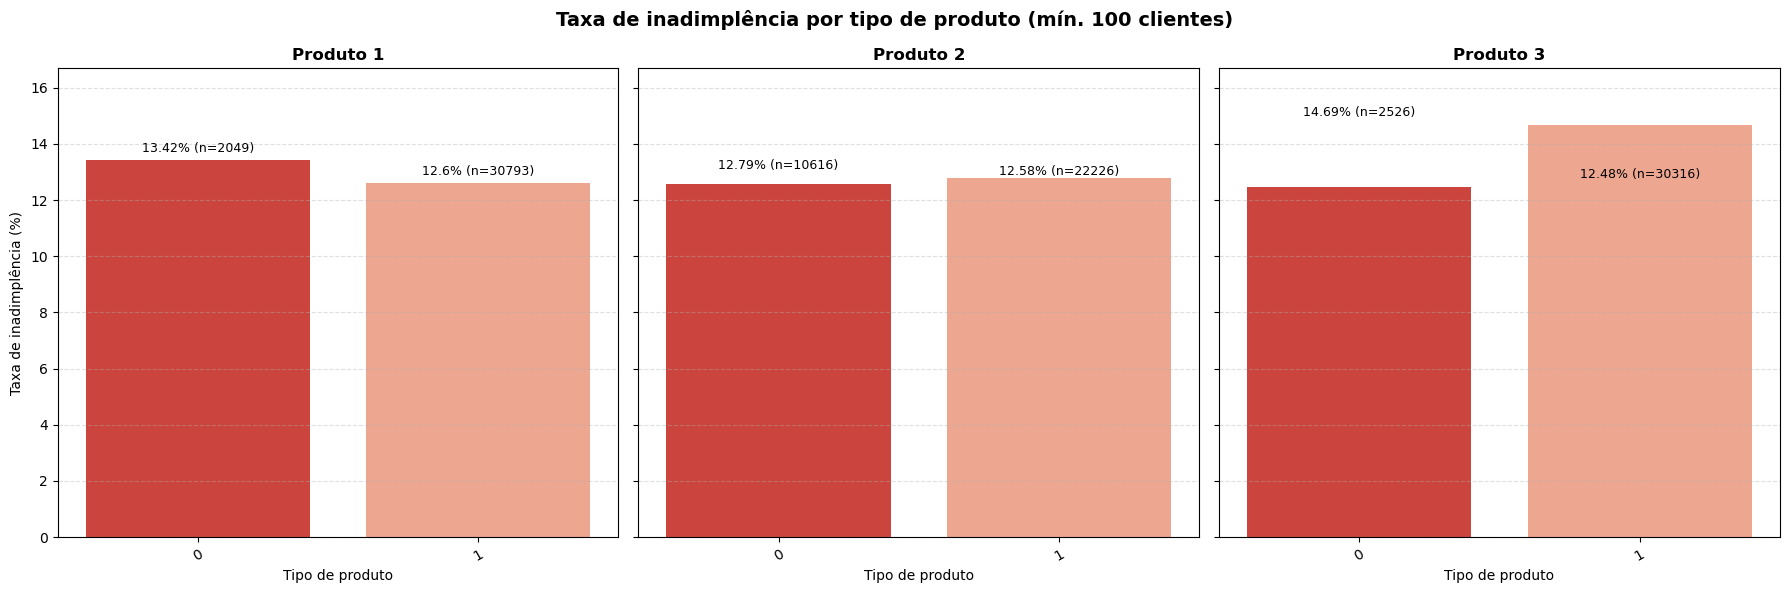

In [48]:
def plot_produto(ax, data, coluna, titulo):
    # Ordenar
    data = data.sort_values("taxa_inadimplencia_%", ascending=False)

    sns.barplot(
        data=data,
        x=coluna,
        y="taxa_inadimplencia_%",
        palette="Reds_r",
        ax=ax
    )

    ax.set_title(titulo, fontweight="bold")
    ax.set_xlabel("Tipo de produto")
    ax.set_ylabel("Taxa de inadimplência (%)")
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    ax.set_ylim(0, data["taxa_inadimplencia_%"].max() + 2)
    ax.tick_params(axis="x", rotation=30)

    # Labels (% + n)
    for i, row in data.iterrows():
        ax.text(
            list(data.index).index(i),
            row["taxa_inadimplencia_%"] + 0.3,
            f'{row["taxa_inadimplencia_%"]}% (n={row["qtd_clientes"]})',
            ha="center",
            fontsize=9
        )


fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

plot_produto(axes[0], taxa_p1, "produto_1", "Produto 1")
plot_produto(axes[1], taxa_p2, "produto_2", "Produto 2")
plot_produto(axes[2], taxa_p3, "produto_3", "Produto 3")

plt.suptitle("Taxa de inadimplência por tipo de produto (mín. 100 clientes)", 
             fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


**Análise**

**Produtos estão associados ao risco de inadimplência?**

**Análise dos subplots**

O gráfico apresenta a taxa de inadimplência (`over30_mob3`) para cada um dos três produtos:

**Produto 1**

* Produto_1 = 0 → taxa ≈ **13,4%**
* Produto_1 = 1 → taxa ≈ **12,5%**

A diferença é pequena, indicando que o Produto 1, isoladamente, não apresenta forte distinção de risco.

**Produto 2**

* Produto_2 = 0 → taxa ≈ **12,6%**
* Produto_2 = 1 → taxa ≈ **12,8%**

As taxas são praticamente iguais, sugerindo que o Produto 2 não possui impacto relevante no risco de inadimplência.

**Produto 3**

* Produto_3 = 0 → taxa ≈ **12,4%**
* Produto_3 = 1 → taxa ≈ **14,6%**

Neste caso, observa-se uma diferença mais clara:
Clientes que adquiriram o Produto 3 (valor = 1) apresentam **maior taxa de inadimplência** em comparação aos que não adquiriram.

**Interpretação técnica**

* Produto 1 e Produto 2 apresentam comportamento semelhante entre clientes adimplentes e inadimplentes, indicando baixo poder discriminativo isoladamente.
* Produto 3 apresenta associação mais forte com inadimplência, sugerindo que esse produto está relacionado a um perfil de cliente com maior risco.

**Conclusão da Questão 7**

> A análise evidencia que apenas o Produto 3 apresenta associação relevante com o risco de inadimplência, enquanto os Produtos 1 e 2 não demonstram diferenças significativas nas taxas de `over30_mob3`.
>
> Isso indica que o tipo de produto adquirido pode estar relacionado ao perfil de risco do cliente, especialmente no caso do Produto 3, devendo ser considerado como variável explicativa no modelo de admissão de crédito.

**Questão 8) O provedor de e-mail está relacionado ao risco de inadimplência?**

**Pergunta:**
Existe diferença na taxa de inadimplência (`over30_mob3`) entre diferentes `provedor_email`?

Objetivo:
Verificar se o tipo de provedor pode indicar maior ou menor confiabilidade do cliente.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\615946202.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


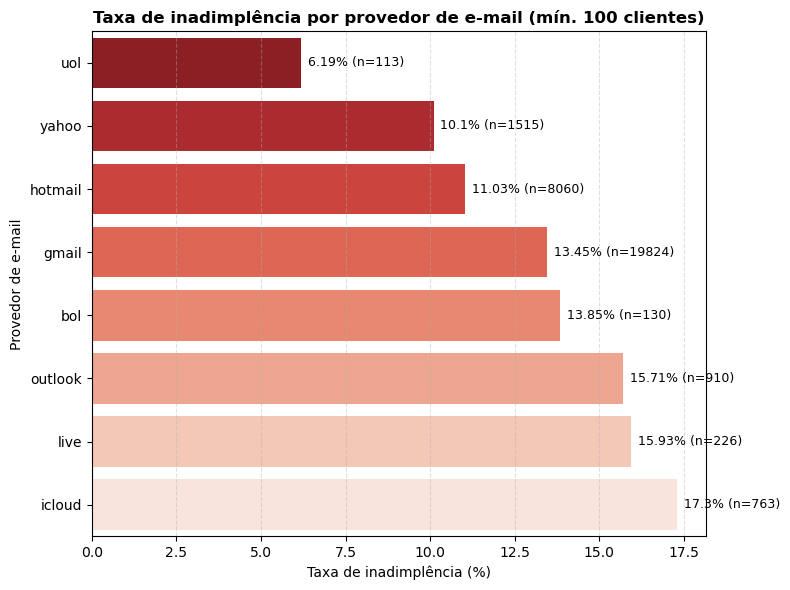

In [57]:
# Tabela: taxa de inadimplência por provedor de e-mail
taxa_email = (
    df.groupby("provedor_email")["over30_mob3"]
      .mean()
      .reset_index()
)

taxa_email["taxa_inadimplencia_%"] = (taxa_email["over30_mob3"] * 100).round(2)

taxa_email = taxa_email.sort_values(by="taxa_inadimplencia_%", ascending=False)

# Filtrar provedores com pouco volume de clientes
contagem_email = df["provedor_email"].value_counts().reset_index()
contagem_email.columns = ["provedor_email", "qtd_clientes"]

taxa_email = taxa_email.merge(contagem_email, on="provedor_email")

taxa_email_filtrado = taxa_email[taxa_email["qtd_clientes"] >= 100]

plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=taxa_email_plot.sort_values("taxa_inadimplencia_%"),
    y="provedor_email",
    x="taxa_inadimplencia_%",
    palette="Reds_r"
)

plt.title("Taxa de inadimplência por provedor de e-mail (mín. 100 clientes)", fontweight="bold")
plt.xlabel("Taxa de inadimplência (%)")
plt.ylabel("Provedor de e-mail")
plt.grid(axis="x", linestyle="--", alpha=0.4)

for i, row in taxa_email_plot.sort_values("taxa_inadimplencia_%").iterrows():
    ax.text(
        row["taxa_inadimplencia_%"] + 0.2,
        list(taxa_email_plot.sort_values("taxa_inadimplencia_%").index).index(i),
        f'{row["taxa_inadimplencia_%"]}% (n={row["qtd_clientes"]})',
        va="center",
        fontsize=9
    )

plt.tight_layout()
plt.show()


**Análise do gráfico (Taxa de inadimplência por provedor de e-mail)**

O gráfico evidencia diferenças relevantes entre os provedores:

* **iCloud:** ~17,5% (maior taxa de inadimplência)
* **Live:** ~16%
* **Outlook:** ~15,7%
* **BOL:** ~14%
* **Gmail:** ~13,5%
* **Hotmail:** ~11%
* **Yahoo:** ~10%
* **UOL:** ~6%
* **Desconhecido:** ~5,5%

Observa-se uma diferença significativa entre os provedores com maior e menor taxa, superior a 10 pontos percentuais.

**Interpretação técnica**

* Existe variação expressiva da taxa de inadimplência entre os diferentes provedores de e-mail.
* Alguns provedores estão associados a perfis de clientes com maior risco, enquanto outros apresentam comportamento mais adimplente.
* O provedor de e-mail pode refletir padrões comportamentais ou de confiabilidade cadastral.

**Conclusão da Questão 8**

> A análise demonstra que a taxa de inadimplência varia de forma relevante entre os provedores de e-mail.
>
> Provedores como iCloud, Live e Outlook apresentam maiores taxas de `over30_mob3`, enquanto UOL e Yahoo apresentam menores níveis de inadimplência.
>
> Esses resultados indicam que o tipo de provedor de e-mail pode ser utilizado como variável complementar na avaliação de risco de crédito, em conjunto com outras características do cliente.

# **Parte 6.1 - Análise fraude**

In [59]:
# Estatística básica dos scores por fraude
variaveis_score = ["score_pessoa", "score_email"]

df.groupby("over30_mob3")[variaveis_score].agg(
    ["mean","median","std"]
).round(2)


score_pessoa                score_email               
                    mean median     std        mean median     std
over30_mob3                                                       
0                 466.21  468.0  125.06      107.00   82.0  139.04
1                 391.89  386.0  121.38      121.75   84.0  154.85

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\1395306053.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\1395306053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


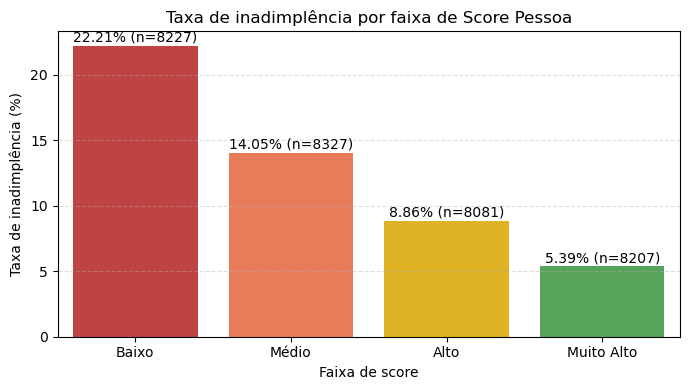

In [58]:
# Taxa de inadimplência por faixa de score
taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_score["taxa_%"] = (taxa_score["mean"]*100).round(2)

plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=taxa_score,
    x="faixa_score_pessoa",
    y="taxa_%",
    order=ordem,
    palette=["#D32F2F","#FF7043","#FFC107","#4CAF50"]
)

plt.title("Taxa de inadimplência por faixa de Score Pessoa")
plt.xlabel("Faixa de score")
plt.ylabel("Taxa de inadimplência (%)")
plt.grid(axis="y", linestyle="--", alpha=0.4)

for i,row in taxa_score.iterrows():
    ax.text(i, row["taxa_%"]+0.3, f'{row["taxa_%"]}% (n={row["count"]})', ha="center")

plt.tight_layout()
plt.show()


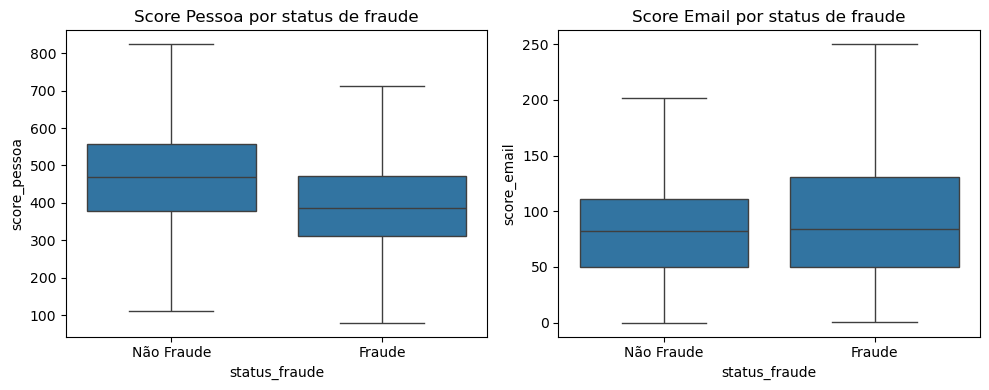

In [60]:
# Boxplot dos scores (fraude vs não fraude)
df["status_fraude"] = df["over30_mob3"].map({0:"Não Fraude",1:"Fraude"})

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(data=df, x="status_fraude", y="score_pessoa", showfliers=False)
plt.title("Score Pessoa por status de fraude")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="status_fraude", y="score_email", showfliers=False)
plt.title("Score Email por status de fraude")

plt.tight_layout()
plt.show()


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3508965909.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\3508965909.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


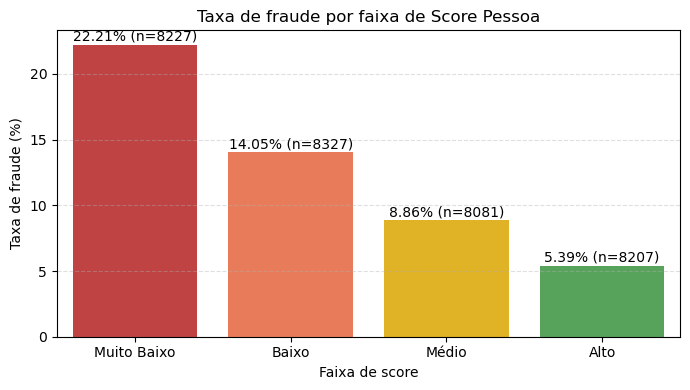

In [61]:
# Taxa de fraude por faixa de score (core da análise)
ordem = ["Muito Baixo","Baixo","Médio","Alto"]

df["faixa_score_pessoa"] = pd.qcut(df["score_pessoa"], q=4, labels=ordem)

taxa_score = df.groupby("faixa_score_pessoa")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_score["taxa_fraude_%"] = (taxa_score["mean"]*100).round(2)

plt.figure(figsize=(7,4))
ax = sns.barplot(
    data=taxa_score,
    x="faixa_score_pessoa",
    y="taxa_fraude_%",
    order=ordem,
    palette=["#D32F2F","#FF7043","#FFC107","#4CAF50"]
)

plt.title("Taxa de fraude por faixa de Score Pessoa")
plt.xlabel("Faixa de score")
plt.ylabel("Taxa de fraude (%)")
plt.grid(axis="y", linestyle="--", alpha=0.4)

for i,row in taxa_score.iterrows():
    ax.text(i, row["taxa_fraude_%"]+0.3, f'{row["taxa_fraude_%"]}% (n={row["count"]})', ha="center")

plt.tight_layout()
plt.show()


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_27512\576513814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxa_email, y="provedor_email", x="taxa_fraude_%", palette="Reds_r")


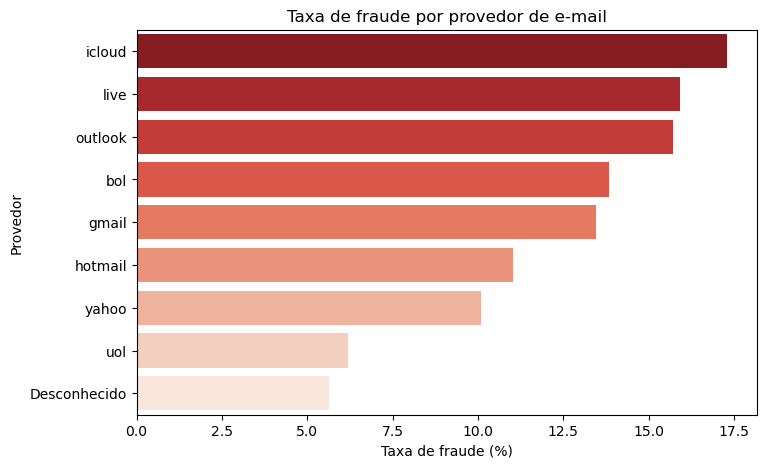

In [63]:
# Fraude por provedor de e-mail (proxy de identidade)
taxa_email = df.groupby("provedor_email")["over30_mob3"].agg(["mean","count"]).reset_index()
taxa_email["taxa_fraude_%"] = (taxa_email["mean"]*100).round(2)
taxa_email = taxa_email[taxa_email["count"]>=100].sort_values("taxa_fraude_%",ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=taxa_email, y="provedor_email", x="taxa_fraude_%", palette="Reds_r")
plt.title("Taxa de fraude por provedor de e-mail")
plt.xlabel("Taxa de fraude (%)")
plt.ylabel("Provedor")
plt.show()


In [ ]:
# Métrica técnica: AUC dos scores (poder antifraude)
from sklearn.metrics import roc_auc_score

auc_pessoa = roc_auc_score(df["over30_mob3"], df["score_pessoa"])
auc_email  = roc_auc_score(df["over30_mob3"], df["score_email"])

print("AUC Score Pessoa:", round(auc_pessoa,3))
print("AUC Score Email :", round(auc_email,3))

AUC Score Pessoa: 0.332
AUC Score Email : 0.537
